In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%pwd

'/content'

In [3]:
ls -la '/content/gdrive/My Drive/2024-II_Analisis_de_Regresion/Regresion_Logistica'

total 11453
-rw------- 1 root root 1013089 Apr 13  2023 '8.0 Logistic Regression.pptx'
-rw------- 1 root root 3654913 Apr  4 01:35 '8.1 Aspectos basicos de analitica avanzada.pptx'
-rw------- 1 root root 1286244 Apr 11 03:34 '8.2.1 Principles of Logistic regression.ipynb'
-rw------- 1 root root  929255 Apr 16 03:37 '8.2.2 Principles of Logistic Regression.ipynb'
-rw------- 1 root root 2142848 Apr 18 02:12 '8.3 Variables analysis Score Jun21.ipynb'
-rw------- 1 root root 1273501 Apr 20  2022 'ALME - conferencias 2022-Abril.pdf'
drwx------ 2 root root    4096 Jan 13 17:16  catboost_info/
-rw------- 1 root root  772081 May 11  2022  ds_04032021.csv
-rw------- 1 root root  650240 May 11  2022 'VARCLUS explanation.ppt'


In [4]:
%cd '/content/gdrive/My Drive/2024-II_Analisis_de_Regresion/Regresion_Logistica'

/content/gdrive/My Drive/2024-II_Analisis_de_Regresion/Regresion_Logistica


In [5]:
%pwd

'/content/gdrive/My Drive/2024-II_Analisis_de_Regresion/Regresion_Logistica'

In [6]:
ls -la

total 11453
-rw------- 1 root root 1013089 Apr 13  2023 '8.0 Logistic Regression.pptx'
-rw------- 1 root root 3654913 Apr  4 01:35 '8.1 Aspectos basicos de analitica avanzada.pptx'
-rw------- 1 root root 1286244 Apr 11 03:34 '8.2.1 Principles of Logistic regression.ipynb'
-rw------- 1 root root  929255 Apr 16 03:37 '8.2.2 Principles of Logistic Regression.ipynb'
-rw------- 1 root root 2142848 Apr 18 02:12 '8.3 Variables analysis Score Jun21.ipynb'
-rw------- 1 root root 1273501 Apr 20  2022 'ALME - conferencias 2022-Abril.pdf'
drwx------ 2 root root    4096 Jan 13 17:16  catboost_info/
-rw------- 1 root root  772081 May 11  2022  ds_04032021.csv
-rw------- 1 root root  650240 May 11  2022 'VARCLUS explanation.ppt'


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df_features=pd.read_csv("ds_04032021.csv")

In [9]:
df_features.shape

(2925, 45)

In [10]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 45 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   user_id                                            2925 non-null   object 
 1   gender                                             2925 non-null   object 
 2   state_group                                        2925 non-null   object 
 3   age                                                2925 non-null   int64  
 4   output                                             2925 non-null   bool   
 5   COUNT(transactions1to30days_purchase)              2925 non-null   int64  
 6   SUM(transactions1to30days_purchase.amount)         2925 non-null   float64
 7   MEAN(transactions1to30days_purchase.amount)        2925 non-null   float64
 8   COUNT(transactions31to60days_purchase)             2925 non-null   int64  
 9   SUM(tran

In [11]:
df_features.groupby(['gender']).count()['user_id']

gender
FEMALE     391
MALE      2534
Name: user_id, dtype: int64

In [12]:
df_features.groupby(['gender'])['user_id'].count()

gender
FEMALE     391
MALE      2534
Name: user_id, dtype: int64

In [13]:
df_features.groupby(['gender','state_group'])['user_id'].count()

gender  state_group   
FEMALE  bajio               18
        caribbean           19
        central_mexico     186
        golfo               40
        north_mexico        66
        pacific             36
        south_mexico        26
MALE    bajio              141
        caribbean          164
        central_mexico    1190
        golfo              218
        north_mexico       387
        not_present          8
        pacific            287
        south_mexico       139
Name: user_id, dtype: int64

In [14]:
df_features.groupby(['month','state_group'])['user_id'].count()

month   state_group   
202012  bajio              151
        caribbean          178
        central_mexico    1306
        golfo              240
        north_mexico       433
        not_present          7
        pacific            307
        south_mexico       155
202101  bajio                8
        caribbean            5
        central_mexico      70
        golfo               18
        north_mexico        20
        not_present          1
        pacific             16
        south_mexico        10
Name: user_id, dtype: int64

In [15]:
df_features.groupby(['state_group'])['user_id'].count()

state_group
bajio              159
caribbean          183
central_mexico    1376
golfo              258
north_mexico       453
not_present          8
pacific            323
south_mexico       165
Name: user_id, dtype: int64

In [16]:
df_features.groupby(['output'])['user_id'].count()

output
False    2073
True      852
Name: user_id, dtype: int64

In [17]:
df_features['output'].mean()

0.29128205128205126

## Discrete Variables

In [18]:
df_scores=df_features['output'].apply(lambda x: 1 if str(x)=="True" else 0)
print(df_scores)

0       0
1       1
2       1
3       1
4       0
       ..
2920    0
2921    0
2922    0
2923    0
2924    0
Name: output, Length: 2925, dtype: int64


In [19]:
df_month=df_features['month']
print(df_month)

0       202012
1       202012
2       202012
3       202012
4       202012
         ...  
2920    202012
2921    202012
2922    202012
2923    202012
2924    202012
Name: month, Length: 2925, dtype: int64


In [20]:
pd.concat([df_month,df_scores], axis=1)

,month,output
0,202012,0
1,202012,1
2,202012,1
3,202012,1
4,202012,0
...,...,...
2920,202012,0
2921,202012,0
2922,202012,0
2923,202012,0


In [21]:
#df_scores=df_features['output']
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'avg_BR']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df = df.sort_values(['prop_n_obs'])
    df = df.reset_index(drop = True)
    return df


In [22]:
df=pd.concat([df_features['state_group'], df_scores], axis = 1)
print(df)

         state_group  output
0       south_mexico       0
1     central_mexico       1
2       south_mexico       1
3       south_mexico       1
4            pacific       0
...              ...     ...
2920  central_mexico       0
2921    north_mexico       0
2922  central_mexico       0
2923  central_mexico       0
2924           bajio       0

[2925 rows x 2 columns]


In [23]:
print(df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count())
print("")
print(df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean())

      state_group  output
0           bajio     159
1       caribbean     183
2  central_mexico    1376
3           golfo     258
4    north_mexico     453
5     not_present       8
6         pacific     323
7    south_mexico     165

      state_group    output
0           bajio  0.276730
1       caribbean  0.262295
2  central_mexico  0.291424
3           golfo  0.259690
4    north_mexico  0.328918
5     not_present  0.625000
6         pacific  0.321981
7    south_mexico  0.206061


In [24]:
df=pd.concat(\
          [df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),\
           df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],\
          axis=1)
print(df)

      state_group  output     state_group    output
0           bajio     159           bajio  0.276730
1       caribbean     183       caribbean  0.262295
2  central_mexico    1376  central_mexico  0.291424
3           golfo     258           golfo  0.259690
4    north_mexico     453    north_mexico  0.328918
5     not_present       8     not_present  0.625000
6         pacific     323         pacific  0.321981
7    south_mexico     165    south_mexico  0.206061


In [25]:
df = df.iloc[:, [0, 1, 3]]
print(df)

      state_group  output    output
0           bajio     159  0.276730
1       caribbean     183  0.262295
2  central_mexico    1376  0.291424
3           golfo     258  0.259690
4    north_mexico     453  0.328918
5     not_present       8  0.625000
6         pacific     323  0.321981
7    south_mexico     165  0.206061


In [26]:
df.columns

Index(['state_group', 'output', 'output'], dtype='object')

In [27]:
df.columns = [df.columns.values[0], 'n_obs', 'avg_BR']
print(df)

      state_group  n_obs    avg_BR
0           bajio    159  0.276730
1       caribbean    183  0.262295
2  central_mexico   1376  0.291424
3           golfo    258  0.259690
4    north_mexico    453  0.328918
5     not_present      8  0.625000
6         pacific    323  0.321981
7    south_mexico    165  0.206061


In [28]:
df['n_obs'].sum()

2925

In [29]:
df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
0           bajio    159  0.276730    0.054359
1       caribbean    183  0.262295    0.062564
2  central_mexico   1376  0.291424    0.470427
3           golfo    258  0.259690    0.088205
4    north_mexico    453  0.328918    0.154872
5     not_present      8  0.625000    0.002735
6         pacific    323  0.321981    0.110427
7    south_mexico    165  0.206061    0.056410


In [30]:
df = df.sort_values(['prop_n_obs'])
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
5     not_present      8  0.625000    0.002735
0           bajio    159  0.276730    0.054359
7    south_mexico    165  0.206061    0.056410
1       caribbean    183  0.262295    0.062564
3           golfo    258  0.259690    0.088205
6         pacific    323  0.321981    0.110427
4    north_mexico    453  0.328918    0.154872
2  central_mexico   1376  0.291424    0.470427


In [31]:
df = df.reset_index(drop = True)
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
0     not_present      8  0.625000    0.002735
1           bajio    159  0.276730    0.054359
2    south_mexico    165  0.206061    0.056410
3       caribbean    183  0.262295    0.062564
4           golfo    258  0.259690    0.088205
5         pacific    323  0.321981    0.110427
6    north_mexico    453  0.328918    0.154872
7  central_mexico   1376  0.291424    0.470427


In [32]:
df_temp = woe_discrete(df_features, 'state_group', df_scores)
print(df_temp)

      state_group  n_obs    avg_BR  prop_n_obs
0     not_present      8  0.625000    0.002735
1           bajio    159  0.276730    0.054359
2    south_mexico    165  0.206061    0.056410
3       caribbean    183  0.262295    0.062564
4           golfo    258  0.259690    0.088205
5         pacific    323  0.321981    0.110427
6    north_mexico    453  0.328918    0.154872
7  central_mexico   1376  0.291424    0.470427


In [33]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['avg_BR']
    y1= df_WoE['prop_n_obs']
    plt.figure(figsize = (14, 4))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Average BR')
    plt.title(str('Average BR by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.bar(x, y1, color = 'b')

      state_group  n_obs    avg_BR  prop_n_obs
0     not_present      8  0.625000    0.002735
1           bajio    159  0.276730    0.054359
2    south_mexico    165  0.206061    0.056410
3       caribbean    183  0.262295    0.062564
4           golfo    258  0.259690    0.088205
5         pacific    323  0.321981    0.110427
6    north_mexico    453  0.328918    0.154872
7  central_mexico   1376  0.291424    0.470427


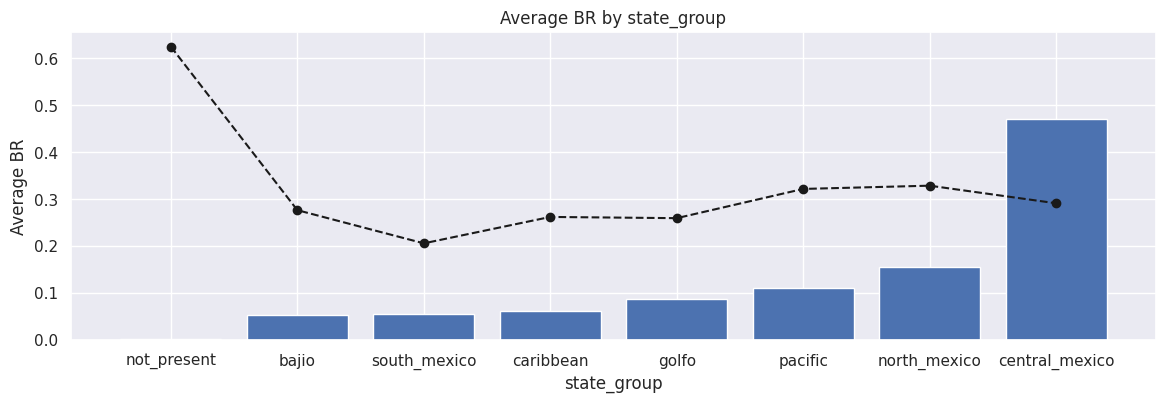

In [34]:
df_temp = woe_discrete(df_features, 'state_group', df_scores)
print(df_temp)
plot_by_woe(df_temp)

   gender  n_obs    avg_BR  prop_n_obs
0  FEMALE    391  0.248082    0.133675
1    MALE   2534  0.297948    0.866325


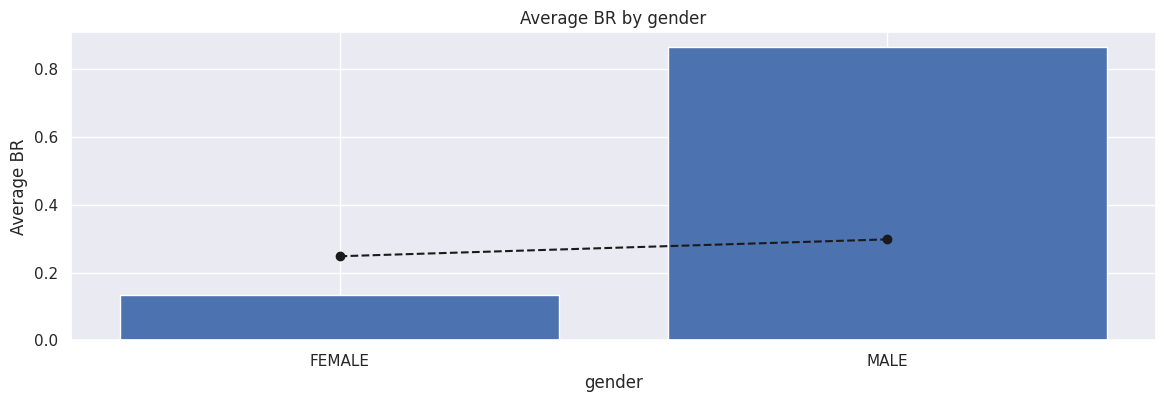

In [35]:
df_temp = woe_discrete(df_features, 'gender', df_scores)
print(df_temp)
plot_by_woe(df_temp)

## Numerical variables

In [36]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'avg_BR']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    return df

    age  n_obs    avg_BR  prop_n_obs
0    18     52  0.307692    0.017778
1    19     69  0.347826    0.023590
2    20     86  0.372093    0.029402
3    21    117  0.427350    0.040000
4    22     78  0.461538    0.026667
5    23    117  0.324786    0.040000
6    24    165  0.406061    0.056410
7    25    140  0.442857    0.047863
8    26    131  0.274809    0.044786
9    27    123  0.357724    0.042051
10   28    150  0.333333    0.051282
11   29    138  0.289855    0.047179
12   30    159  0.276730    0.054359
13   31    155  0.258065    0.052991
14   32    127  0.299213    0.043419
15   33    114  0.271930    0.038974
16   34    130  0.261538    0.044444
17   35    122  0.245902    0.041709
18   36     76  0.302632    0.025983
19   37     57  0.175439    0.019487
20   38     64  0.203125    0.021880
21   39     35  0.171429    0.011966
22   40     42  0.142857    0.014359
23   41     37  0.216216    0.012650
24   42     37  0.108108    0.012650
25   43     38  0.157895    0.012991
2

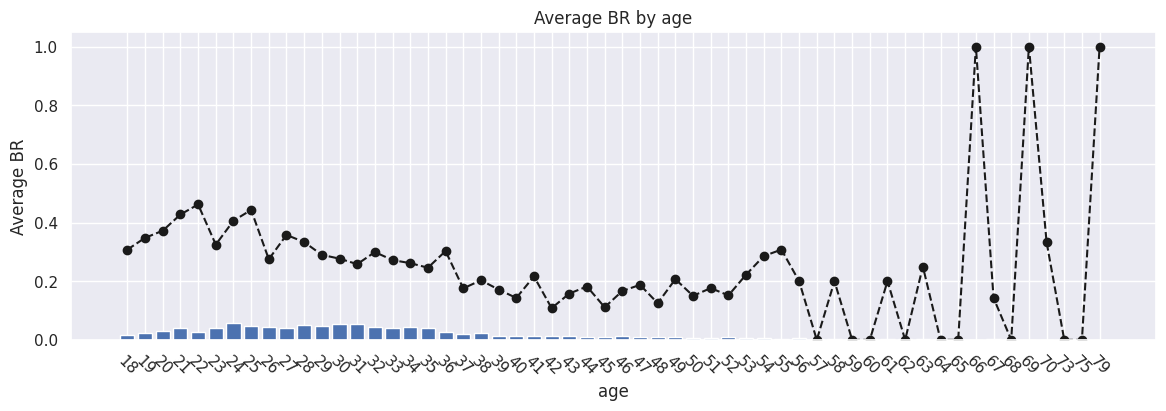

In [37]:
df_temp_A = woe_ordered_continuous(df_features, 'age', df_scores)
print(df_temp_A)
plot_by_woe(df_temp_A, rotation_of_x_axis_labels=-45)

In [38]:
#SUM(transactions31to60days_clabeInc.amount)
df_features['age_factor'] = pd.qcut(df_features['age'], q=10, duplicates='drop', precision=3)
df_features.loc[:,['age','age_factor']]


,age,age_factor
0,49,"(46.0, 79.0]"
1,29,"(28.0, 30.0]"
2,49,"(46.0, 79.0]"
3,54,"(46.0, 79.0]"
4,34,"(32.0, 34.0]"
...,...,...
2920,30,"(28.0, 30.0]"
2921,31,"(30.0, 32.0]"
2922,38,"(34.0, 38.0]"
2923,53,"(46.0, 79.0]"


In [39]:
df_features.groupby(['age_factor'])['age'].count()

age_factor
(17.999, 21.0]    324
(21.0, 24.0]      360
(24.0, 26.0]      271
(26.0, 28.0]      273
(28.0, 30.0]      297
(30.0, 32.0]      282
(32.0, 34.0]      244
(34.0, 38.0]      319
(38.0, 46.0]      285
(46.0, 79.0]      270
Name: age, dtype: int64

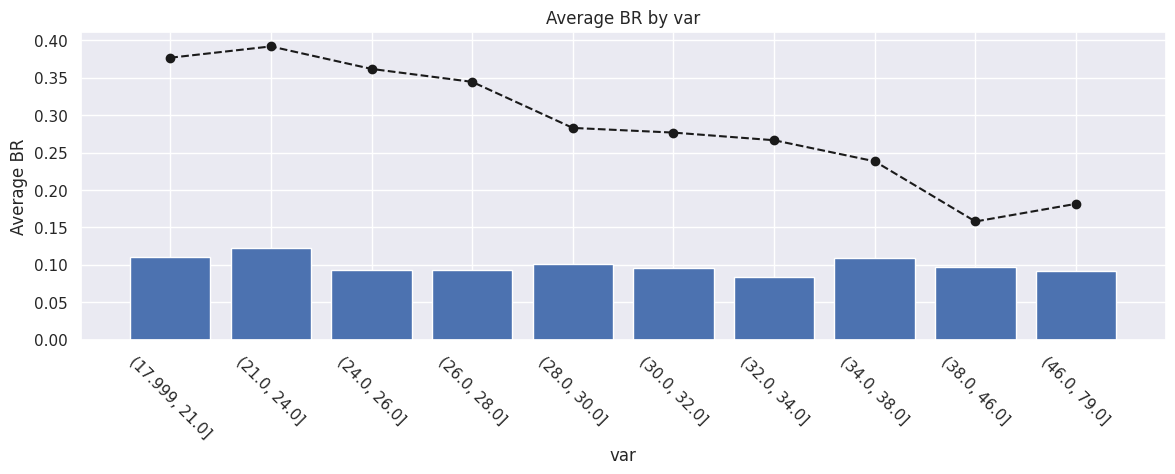

In [40]:
df_tempn = woe_ordered_continuous(df_features, 'age_factor', df_scores)
df_tempn.columns = ['var', 'n_obs', 'avg_BR','prop_n_obs']
df_tempn
plot_by_woe(df_tempn, rotation_of_x_axis_labels=-45)


In [41]:
df_features.columns

Index(['user_id', 'gender', 'state_group', 'age', 'output',
       'COUNT(transactions1to30days_purchase)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'SUM(transactions31to60days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'COUNT(transactions1to30days_clabeInc)',
       'SUM(transactions1to30days_clabeInc.amount)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions31to60days_clabeInc)',
       'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(transactions31to60days_clabeInc.amount)',
       'COUNT(transactions1to30days_clabeOut)',
       'SUM(transactions1to30days_clabeOut.amount)',
       'MEAN(transactions1to30days_clabeOut.amount)',
       'COUNT(transactions31to60days_clabeOut)',
       'SUM(transactions31to60days_clabeOut.amount)',
       'MEAN(transactions31to60days_clabeOut.amount)',
 

In [42]:
df_features_num=df_features.loc[:,['age',
                                   'SUM(transactions31to60days_clabeInc.amount)',
                                   'MEAN(balance31to60days.current_balance)',
                                   'MEAN(transactions1to30days_clabeInc.amount)',
                                   'COUNT(transactions1to30days_atm)',
                                   'MEAN(transactions1to30days_atm.amount)',
                                   'COUNT(transactions31to60days_atm)',
                                   'SUM(transactions1to30days_purchase.amount)',
                                   'MEAN(transactions31to60days_purchase.amount)',
                                   'MEAN(transactions1to30days_purchase.amount)',
                                   'COUNT(transactions31to60days_purchase)',
                                   'COUNT(transactions1to30days_clabeOut)',
                                   'COUNT(transactions31to60days_clabeOut)',
                                   'MEAN(transactions31to60days_clabeOut.amount)',
                                   'ratioBalanceClabeIn_1to30days',
                                   'ratioCableInOut_1to30days',
                                   'ratioBalanceClabeIn_31to60days']]
num_vars=df_features_num.columns
print(num_vars)

Index(['age', 'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(balance31to60days.current_balance)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions1to30days_atm)',
       'MEAN(transactions1to30days_atm.amount)',
       'COUNT(transactions31to60days_atm)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'COUNT(transactions1to30days_clabeOut)',
       'COUNT(transactions31to60days_clabeOut)',
       'MEAN(transactions31to60days_clabeOut.amount)',
       'ratioBalanceClabeIn_1to30days', 'ratioCableInOut_1to30days',
       'ratioBalanceClabeIn_31to60days'],
      dtype='object')


In [43]:
df_features_num.head()

,age,SUM(transactions31to60days_clabeInc.amount),MEAN(balance31to60days.current_balance),MEAN(transactions1to30days_clabeInc.amount),COUNT(transactions1to30days_atm),MEAN(transactions1to30days_atm.amount),COUNT(transactions31to60days_atm),SUM(transactions1to30days_purchase.amount),MEAN(transactions31to60days_purchase.amount),MEAN(transactions1to30days_purchase.amount),COUNT(transactions31to60days_purchase),COUNT(transactions1to30days_clabeOut),COUNT(transactions31to60days_clabeOut),MEAN(transactions31to60days_clabeOut.amount),ratioBalanceClabeIn_1to30days,ratioCableInOut_1to30days,ratioBalanceClabeIn_31to60days
0,49,8976.0,395.500,991.5,0,0.0,0,3094.0,128.625,386.750,25,8,11,522.50,0.073,1.333,0.044
1,29,511.0,55.062,500.0,0,0.0,0,302.0,0.000,100.625,0,6,1,13.00,0.145,3.000,0.108
2,49,12256.0,708.500,737.5,4,1147.0,5,3540.0,152.875,252.750,23,23,16,287.25,0.031,0.697,0.058
3,54,4164.0,440.500,270.0,0,0.0,2,1963.0,67.875,89.188,12,9,5,397.50,0.040,1.000,0.106
4,34,1890.0,717.500,0.0,0,0.0,0,1115.0,51.438,557.500,5,0,0,0.00,0.000,0.000,0.380


In [44]:
num_vars

Index(['age', 'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(balance31to60days.current_balance)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions1to30days_atm)',
       'MEAN(transactions1to30days_atm.amount)',
       'COUNT(transactions31to60days_atm)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'COUNT(transactions1to30days_clabeOut)',
       'COUNT(transactions31to60days_clabeOut)',
       'MEAN(transactions31to60days_clabeOut.amount)',
       'ratioBalanceClabeIn_1to30days', 'ratioCableInOut_1to30days',
       'ratioBalanceClabeIn_31to60days'],
      dtype='object')

<Axes: >

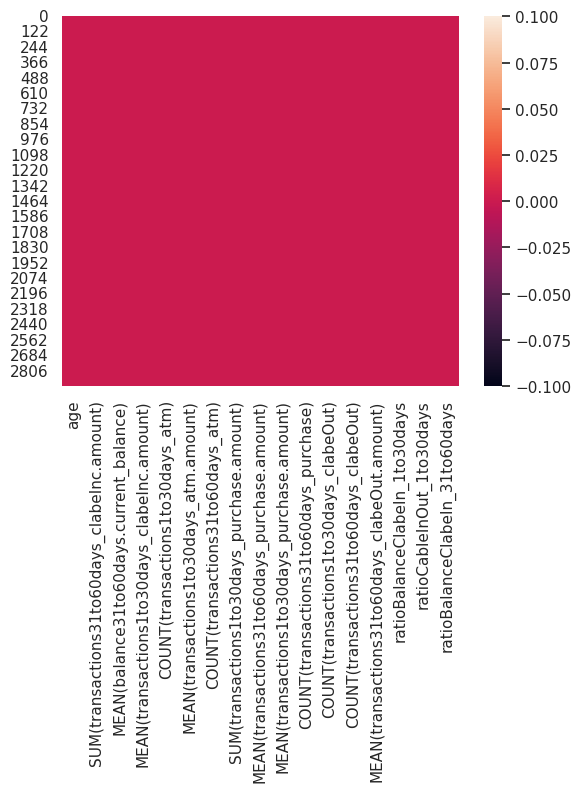

In [45]:
sns.heatmap(df_features_num.isnull())

In [46]:
#Checamos si nuestros datos contienen nulos
print((df_features_num.isnull().sum() * 100 / df_features_num.shape[0]).sort_values(ascending=False))

age                                             0.0
MEAN(transactions1to30days_purchase.amount)     0.0
ratioCableInOut_1to30days                       0.0
ratioBalanceClabeIn_1to30days                   0.0
MEAN(transactions31to60days_clabeOut.amount)    0.0
COUNT(transactions31to60days_clabeOut)          0.0
COUNT(transactions1to30days_clabeOut)           0.0
COUNT(transactions31to60days_purchase)          0.0
MEAN(transactions31to60days_purchase.amount)    0.0
SUM(transactions31to60days_clabeInc.amount)     0.0
SUM(transactions1to30days_purchase.amount)      0.0
COUNT(transactions31to60days_atm)               0.0
MEAN(transactions1to30days_atm.amount)          0.0
COUNT(transactions1to30days_atm)                0.0
MEAN(transactions1to30days_clabeInc.amount)     0.0
MEAN(balance31to60days.current_balance)         0.0
ratioBalanceClabeIn_31to60days                  0.0
dtype: float64


In [47]:
#Checamos si nuestros datos contienen infinitos

i=0
df_inf_lista=[]
for col in num_vars:
  infinitos=np.isinf(df_features_num[col]).sum()
  if infinitos >0:
    i=i+1
    df_inf_lista.append(col)
    print("num_variable:",i)
    print(col, infinitos)

num_variable: 1
SUM(transactions31to60days_clabeInc.amount) 5


In [48]:
df_features_num[np.isinf(df_features_num['SUM(transactions31to60days_clabeInc.amount)'])==True]['SUM(transactions31to60days_clabeInc.amount)']

66      inf
439     inf
1243    inf
1921    inf
2242    inf
Name: SUM(transactions31to60days_clabeInc.amount), dtype: float64

In [49]:
df_features_num['SUM(transactions31to60days_clabeInc.amount)'].describe()

count    2925.0
mean        inf
std         NaN
min         0.0
25%        40.0
50%      1133.0
75%      3476.0
max         inf
Name: SUM(transactions31to60days_clabeInc.amount), dtype: float64

In [50]:
df_features_num['SUM(transactions31to60days_clabeInc.amount)']=df_features_num['SUM(transactions31to60days_clabeInc.amount)'].apply(lambda x: 3476 if str(x)=="inf" else x )

In [51]:
i=0
df_inf_lista=[]
for col in num_vars:
  infinitos=np.isinf(df_features_num[col]).sum()
  if infinitos >0:
    i=i+1
    df_inf_lista.append(col)
    print("num_variable:",i)
    print(col, infinitos)

In [52]:
df_features_num_factors=pd.DataFrame()
for var in num_vars:
  #df_features_num_factors[var] = pd.qcut(df_features_num[var], q=10, duplicates='drop', precision=3)
  df_features_num_factors[var] = pd.qcut(df_features_num[var], q=10, duplicates='drop')
  print(var)
  #df_features_num_factors[var] = pd.cut(df_features[var], 10)

age
SUM(transactions31to60days_clabeInc.amount)
MEAN(balance31to60days.current_balance)
MEAN(transactions1to30days_clabeInc.amount)
COUNT(transactions1to30days_atm)
MEAN(transactions1to30days_atm.amount)
COUNT(transactions31to60days_atm)
SUM(transactions1to30days_purchase.amount)
MEAN(transactions31to60days_purchase.amount)
MEAN(transactions1to30days_purchase.amount)
COUNT(transactions31to60days_purchase)
COUNT(transactions1to30days_clabeOut)
COUNT(transactions31to60days_clabeOut)
MEAN(transactions31to60days_clabeOut.amount)
ratioBalanceClabeIn_1to30days
ratioCableInOut_1to30days
ratioBalanceClabeIn_31to60days


In [53]:
df_features_num_factors.head()

,age,SUM(transactions31to60days_clabeInc.amount),MEAN(balance31to60days.current_balance),MEAN(transactions1to30days_clabeInc.amount),COUNT(transactions1to30days_atm),MEAN(transactions1to30days_atm.amount),COUNT(transactions31to60days_atm),SUM(transactions1to30days_purchase.amount),MEAN(transactions31to60days_purchase.amount),MEAN(transactions1to30days_purchase.amount),COUNT(transactions31to60days_purchase),COUNT(transactions1to30days_clabeOut),COUNT(transactions31to60days_clabeOut),MEAN(transactions31to60days_clabeOut.amount),ratioBalanceClabeIn_1to30days,ratioCableInOut_1to30days,ratioBalanceClabeIn_31to60days
0,"(46.0, 79.0]","(8428.8, 56896.0]","(289.65, 532.6]","(850.0, 1213.2]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(2522.4, 4754.4]","(100.05, 150.0]","(274.05, 426.55]","(16.0, 89.0]","(6.0, 9.0]","(7.0, 36.0]","(520.4, 993.7]","(0.068, 0.0864]","(1.0, 1.5]","(0.02, 0.045]"
1,"(28.0, 30.0]","(200.2, 700.0]","(21.441, 57.868]","(437.5, 614.3]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(266.0, 546.5]","(-0.001, 33.725]","(100.0, 142.75]","(-0.001, 1.0]","(4.0, 6.0]","(-0.001, 1.0]","(-0.001, 64.125]","(0.114, 0.16]","(1.5, 13.0]","(0.096, 0.138]"
2,"(46.0, 79.0]","(8428.8, 56896.0]","(532.6, 999.8]","(614.3, 850.0]","(1.6, 16.0]","(982.5, 8036.0]","(1.0, 20.0]","(2522.4, 4754.4]","(150.0, 217.475]","(196.675, 274.05]","(16.0, 89.0]","(9.0, 40.0]","(7.0, 36.0]","(171.25, 305.9]","(0.01, 0.036]","(0.6, 0.857]","(0.045, 0.068]"
3,"(46.0, 79.0]","(2770.4, 4437.6]","(289.65, 532.6]","(183.45, 300.0]","(-0.001, 1.0]","(-0.001, 234.625]","(1.0, 20.0]","(1530.6, 2522.4]","(63.281, 100.05]","(70.537, 100.0]","(9.0, 16.0]","(6.0, 9.0]","(4.0, 7.0]","(305.9, 520.4]","(0.036, 0.051]","(0.857, 1.0]","(0.096, 0.138]"
4,"(32.0, 34.0]","(1797.0, 2770.4]","(532.6, 999.8]","(-0.001, 79.013]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(938.8, 1530.6]","(33.725, 63.281]","(426.55, 14496.0]","(3.0, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 64.125]","(-0.104, 0.0]","(-0.001, 0.231]","(0.21, 0.38]"


In [54]:
df_features_num_factors.head()

,age,SUM(transactions31to60days_clabeInc.amount),MEAN(balance31to60days.current_balance),MEAN(transactions1to30days_clabeInc.amount),COUNT(transactions1to30days_atm),MEAN(transactions1to30days_atm.amount),COUNT(transactions31to60days_atm),SUM(transactions1to30days_purchase.amount),MEAN(transactions31to60days_purchase.amount),MEAN(transactions1to30days_purchase.amount),COUNT(transactions31to60days_purchase),COUNT(transactions1to30days_clabeOut),COUNT(transactions31to60days_clabeOut),MEAN(transactions31to60days_clabeOut.amount),ratioBalanceClabeIn_1to30days,ratioCableInOut_1to30days,ratioBalanceClabeIn_31to60days
0,"(46.0, 79.0]","(8428.8, 56896.0]","(289.65, 532.6]","(850.0, 1213.2]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(2522.4, 4754.4]","(100.05, 150.0]","(274.05, 426.55]","(16.0, 89.0]","(6.0, 9.0]","(7.0, 36.0]","(520.4, 993.7]","(0.068, 0.0864]","(1.0, 1.5]","(0.02, 0.045]"
1,"(28.0, 30.0]","(200.2, 700.0]","(21.441, 57.868]","(437.5, 614.3]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(266.0, 546.5]","(-0.001, 33.725]","(100.0, 142.75]","(-0.001, 1.0]","(4.0, 6.0]","(-0.001, 1.0]","(-0.001, 64.125]","(0.114, 0.16]","(1.5, 13.0]","(0.096, 0.138]"
2,"(46.0, 79.0]","(8428.8, 56896.0]","(532.6, 999.8]","(614.3, 850.0]","(1.6, 16.0]","(982.5, 8036.0]","(1.0, 20.0]","(2522.4, 4754.4]","(150.0, 217.475]","(196.675, 274.05]","(16.0, 89.0]","(9.0, 40.0]","(7.0, 36.0]","(171.25, 305.9]","(0.01, 0.036]","(0.6, 0.857]","(0.045, 0.068]"
3,"(46.0, 79.0]","(2770.4, 4437.6]","(289.65, 532.6]","(183.45, 300.0]","(-0.001, 1.0]","(-0.001, 234.625]","(1.0, 20.0]","(1530.6, 2522.4]","(63.281, 100.05]","(70.537, 100.0]","(9.0, 16.0]","(6.0, 9.0]","(4.0, 7.0]","(305.9, 520.4]","(0.036, 0.051]","(0.857, 1.0]","(0.096, 0.138]"
4,"(32.0, 34.0]","(1797.0, 2770.4]","(532.6, 999.8]","(-0.001, 79.013]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(938.8, 1530.6]","(33.725, 63.281]","(426.55, 14496.0]","(3.0, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 64.125]","(-0.104, 0.0]","(-0.001, 0.231]","(0.21, 0.38]"


In [55]:
df_features_num_factors.shape

(2925, 17)

In [56]:
df_features_num_factors.head()

,age,SUM(transactions31to60days_clabeInc.amount),MEAN(balance31to60days.current_balance),MEAN(transactions1to30days_clabeInc.amount),COUNT(transactions1to30days_atm),MEAN(transactions1to30days_atm.amount),COUNT(transactions31to60days_atm),SUM(transactions1to30days_purchase.amount),MEAN(transactions31to60days_purchase.amount),MEAN(transactions1to30days_purchase.amount),COUNT(transactions31to60days_purchase),COUNT(transactions1to30days_clabeOut),COUNT(transactions31to60days_clabeOut),MEAN(transactions31to60days_clabeOut.amount),ratioBalanceClabeIn_1to30days,ratioCableInOut_1to30days,ratioBalanceClabeIn_31to60days
0,"(46.0, 79.0]","(8428.8, 56896.0]","(289.65, 532.6]","(850.0, 1213.2]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(2522.4, 4754.4]","(100.05, 150.0]","(274.05, 426.55]","(16.0, 89.0]","(6.0, 9.0]","(7.0, 36.0]","(520.4, 993.7]","(0.068, 0.0864]","(1.0, 1.5]","(0.02, 0.045]"
1,"(28.0, 30.0]","(200.2, 700.0]","(21.441, 57.868]","(437.5, 614.3]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(266.0, 546.5]","(-0.001, 33.725]","(100.0, 142.75]","(-0.001, 1.0]","(4.0, 6.0]","(-0.001, 1.0]","(-0.001, 64.125]","(0.114, 0.16]","(1.5, 13.0]","(0.096, 0.138]"
2,"(46.0, 79.0]","(8428.8, 56896.0]","(532.6, 999.8]","(614.3, 850.0]","(1.6, 16.0]","(982.5, 8036.0]","(1.0, 20.0]","(2522.4, 4754.4]","(150.0, 217.475]","(196.675, 274.05]","(16.0, 89.0]","(9.0, 40.0]","(7.0, 36.0]","(171.25, 305.9]","(0.01, 0.036]","(0.6, 0.857]","(0.045, 0.068]"
3,"(46.0, 79.0]","(2770.4, 4437.6]","(289.65, 532.6]","(183.45, 300.0]","(-0.001, 1.0]","(-0.001, 234.625]","(1.0, 20.0]","(1530.6, 2522.4]","(63.281, 100.05]","(70.537, 100.0]","(9.0, 16.0]","(6.0, 9.0]","(4.0, 7.0]","(305.9, 520.4]","(0.036, 0.051]","(0.857, 1.0]","(0.096, 0.138]"
4,"(32.0, 34.0]","(1797.0, 2770.4]","(532.6, 999.8]","(-0.001, 79.013]","(-0.001, 1.0]","(-0.001, 234.625]","(-0.001, 1.0]","(938.8, 1530.6]","(33.725, 63.281]","(426.55, 14496.0]","(3.0, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 64.125]","(-0.104, 0.0]","(-0.001, 0.231]","(0.21, 0.38]"


              age  n_obs    avg_BR  prop_n_obs
0  (17.999, 21.0]    324  0.376543    0.110769
1    (21.0, 24.0]    360  0.391667    0.123077
2    (24.0, 26.0]    271  0.361624    0.092650
3    (26.0, 28.0]    273  0.344322    0.093333
4    (28.0, 30.0]    297  0.282828    0.101538
5    (30.0, 32.0]    282  0.276596    0.096410
6    (32.0, 34.0]    244  0.266393    0.083419
7    (34.0, 38.0]    319  0.238245    0.109060
8    (38.0, 46.0]    285  0.157895    0.097436
9    (46.0, 79.0]    270  0.181481    0.092308


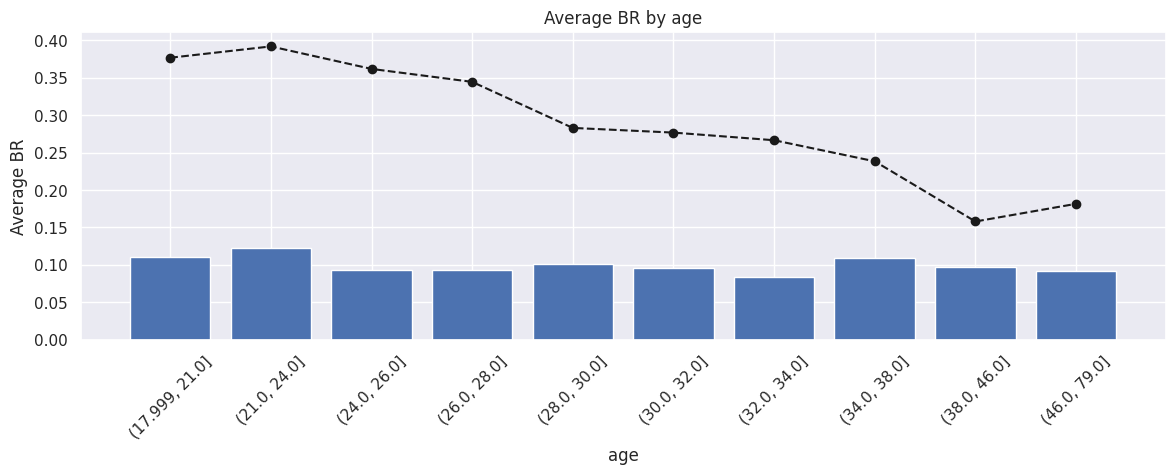

In [57]:
df_tempn = woe_ordered_continuous(df_features_num_factors, 'age', df_scores)
print(df_tempn)
plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)

  MEAN(balance31to60days.current_balance)  n_obs    avg_BR  prop_n_obs
0                        (-4800.001, 0.0]    581  0.304647    0.198632
1                             (0.0, 0.08]      5  0.600000    0.001709
2                          (0.08, 21.441]    292  0.431507    0.099829
3                        (21.441, 57.868]    292  0.315068    0.099829
4                       (57.868, 107.062]    293  0.327645    0.100171
5                       (107.062, 178.75]    294  0.309524    0.100513
6                        (178.75, 289.65]    290  0.255172    0.099145
7                         (289.65, 532.6]    293  0.279863    0.100171
8                          (532.6, 999.8]    292  0.208904    0.099829
9                        (999.8, 15936.0]    293  0.170648    0.100171


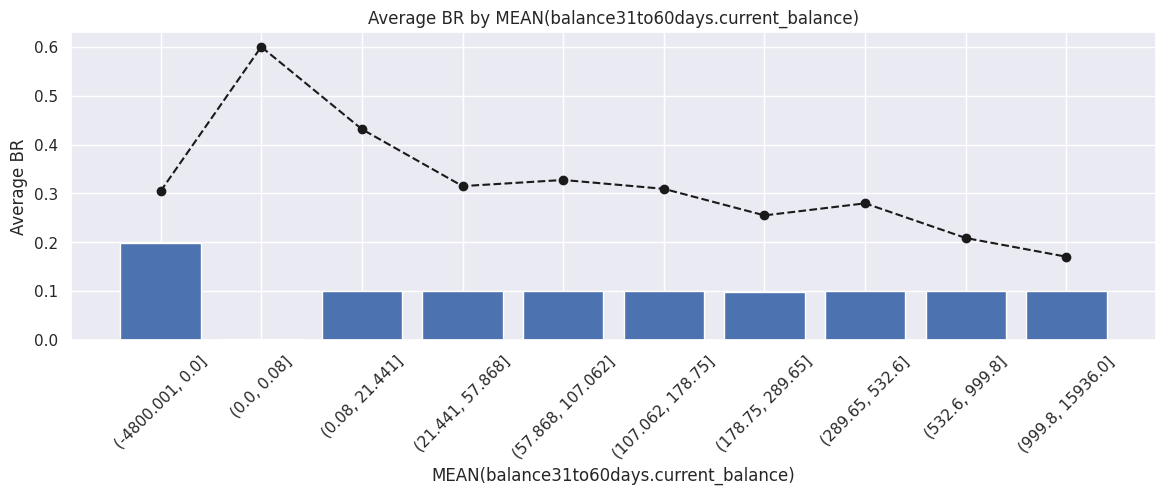

In [58]:
df_tempn = woe_ordered_continuous(df_features_num_factors, 'MEAN(balance31to60days.current_balance)', df_scores)
print(df_tempn)
plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)

In [59]:
def tabla_plot(df1,var,df2):
  df_tempn = woe_ordered_continuous(df1, var, df2)
  print("Value Analysis for: "+var)
  print("")
  print(df_tempn)
  print("")
  plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)

Value Analysis for: age

              age  n_obs    avg_BR  prop_n_obs
0  (17.999, 21.0]    324  0.376543    0.110769
1    (21.0, 24.0]    360  0.391667    0.123077
2    (24.0, 26.0]    271  0.361624    0.092650
3    (26.0, 28.0]    273  0.344322    0.093333
4    (28.0, 30.0]    297  0.282828    0.101538
5    (30.0, 32.0]    282  0.276596    0.096410
6    (32.0, 34.0]    244  0.266393    0.083419
7    (34.0, 38.0]    319  0.238245    0.109060
8    (38.0, 46.0]    285  0.157895    0.097436
9    (46.0, 79.0]    270  0.181481    0.092308



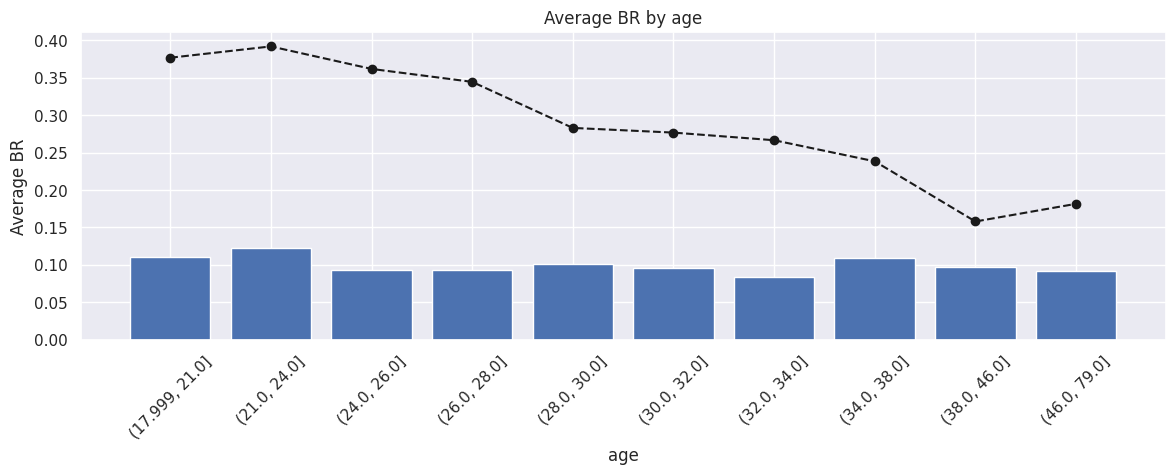

In [60]:
tabla_plot(df_features_num_factors,'age',df_scores)



Value Analysis for: age

              age  n_obs    avg_BR  prop_n_obs
0  (17.999, 21.0]    324  0.376543    0.110769
1    (21.0, 24.0]    360  0.391667    0.123077
2    (24.0, 26.0]    271  0.361624    0.092650
3    (26.0, 28.0]    273  0.344322    0.093333
4    (28.0, 30.0]    297  0.282828    0.101538
5    (30.0, 32.0]    282  0.276596    0.096410
6    (32.0, 34.0]    244  0.266393    0.083419
7    (34.0, 38.0]    319  0.238245    0.109060
8    (38.0, 46.0]    285  0.157895    0.097436
9    (46.0, 79.0]    270  0.181481    0.092308

---------------------------------------------------------------------------------------------------



Value Analysis for: SUM(transactions31to60days_clabeInc.amount)

  SUM(transactions31to60days_clabeInc.amount)  n_obs    avg_BR  prop_n_obs
0                             (-0.001, 200.2]    878  0.299544    0.300171
1                              (200.2, 700.0]    300  0.276667    0.102564
2                             (700.0, 1133.0]    285  0.273684

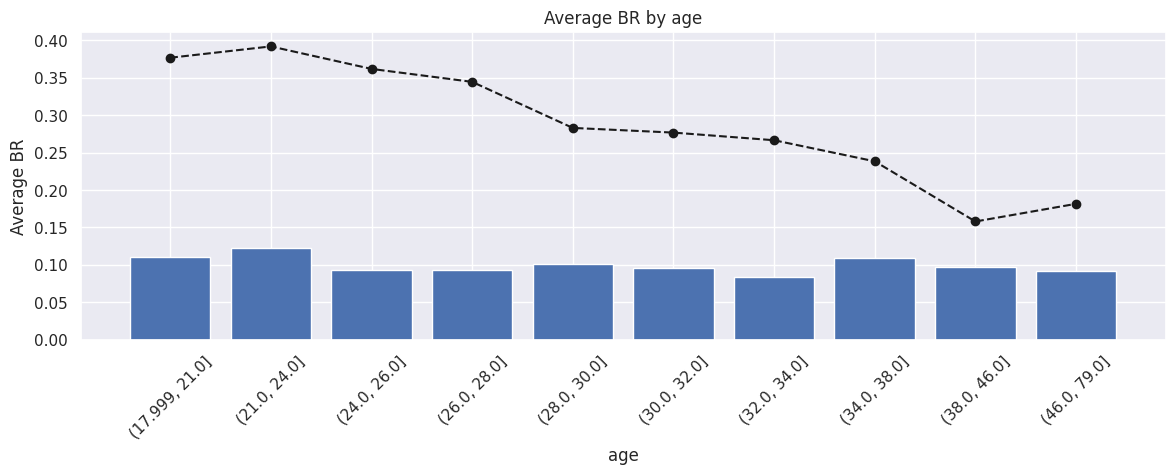

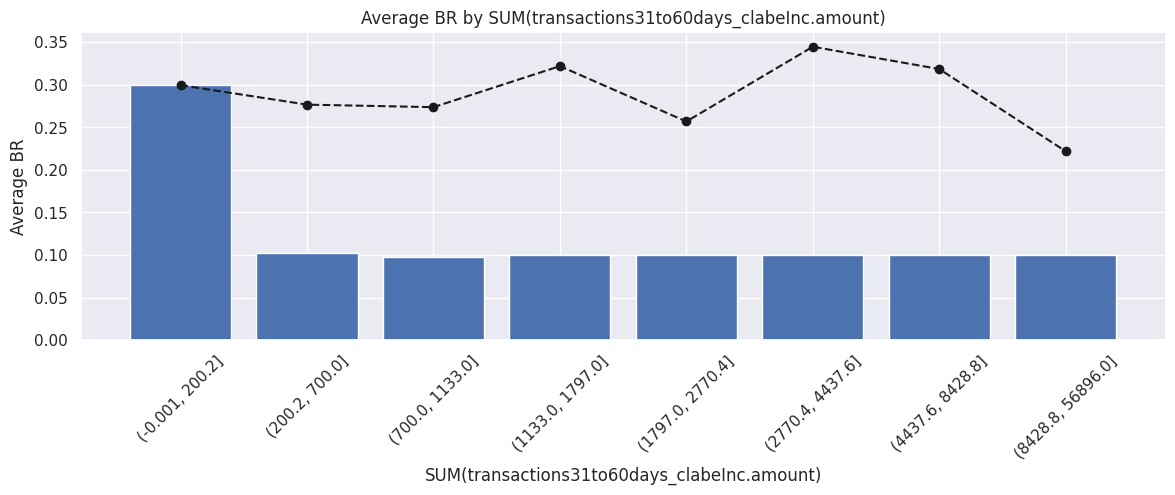

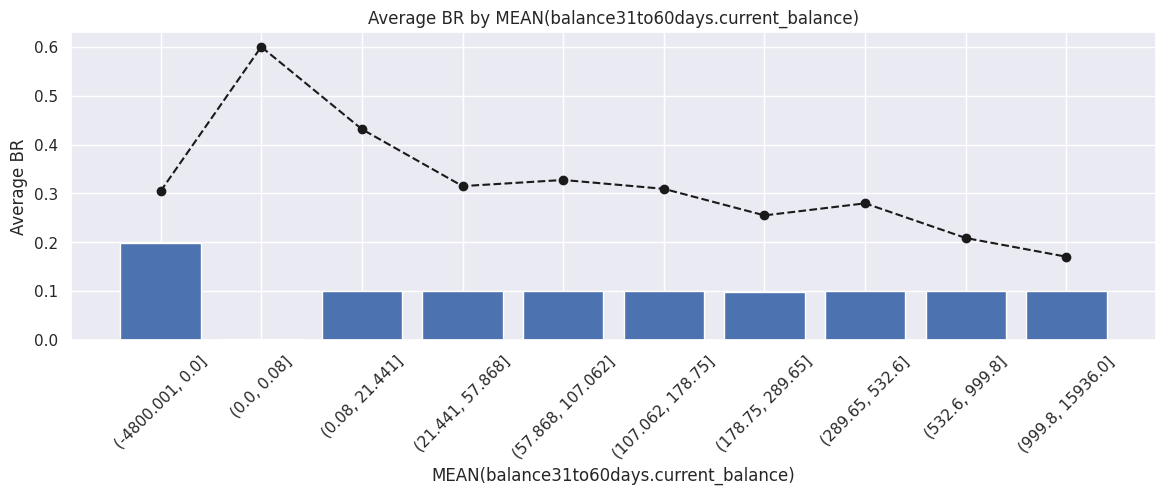

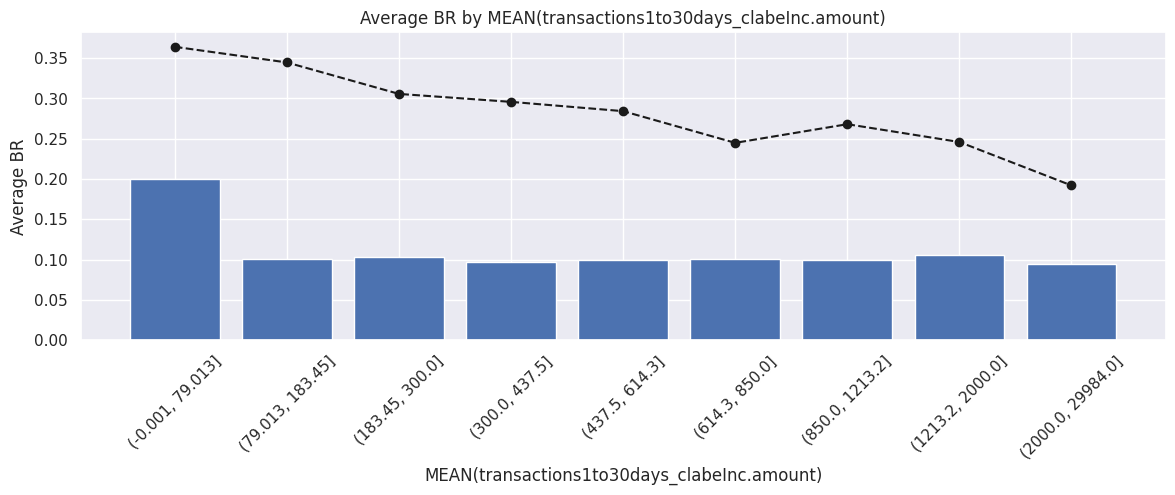

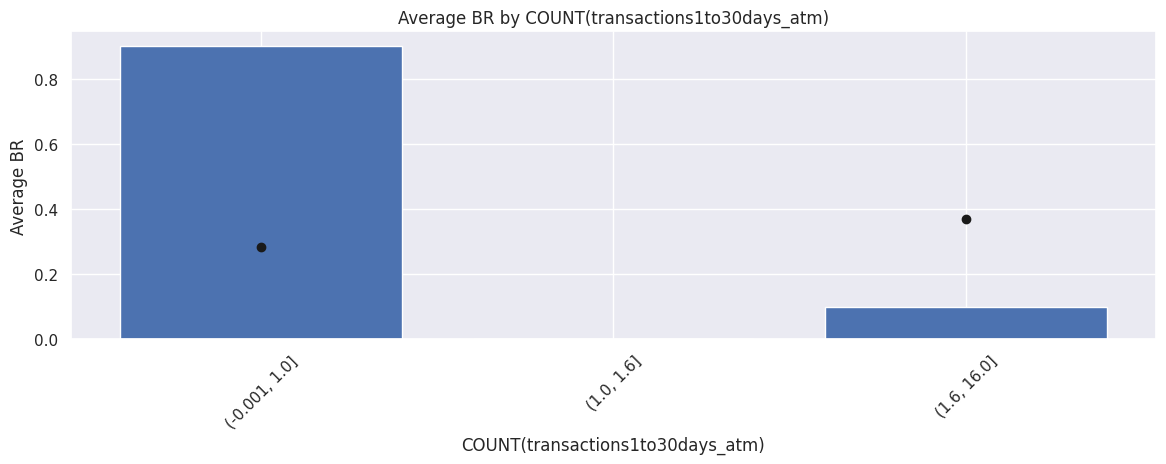

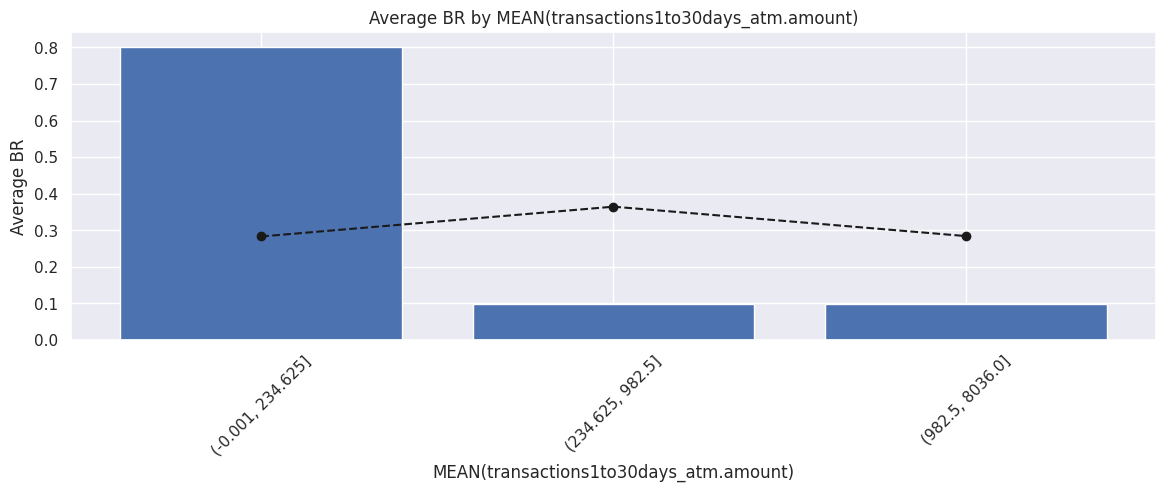

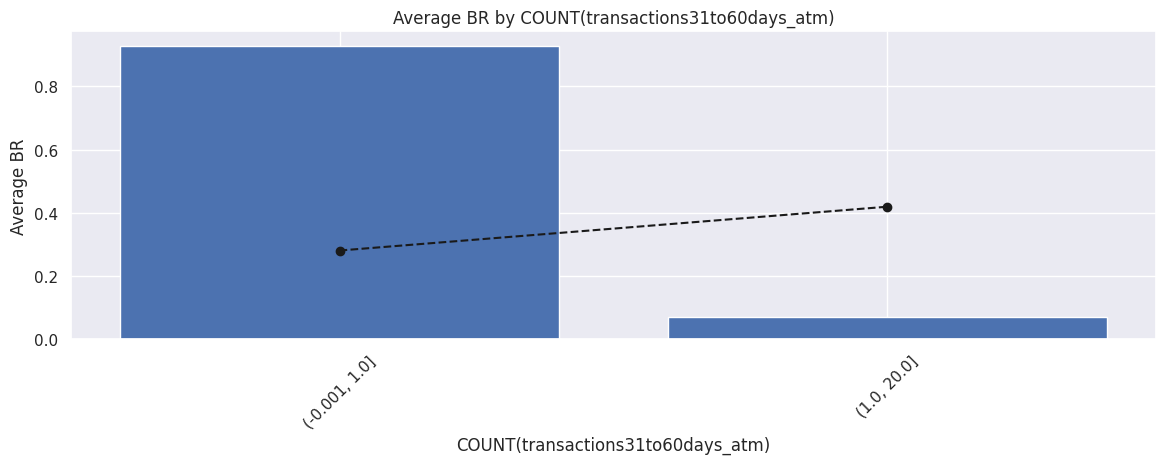

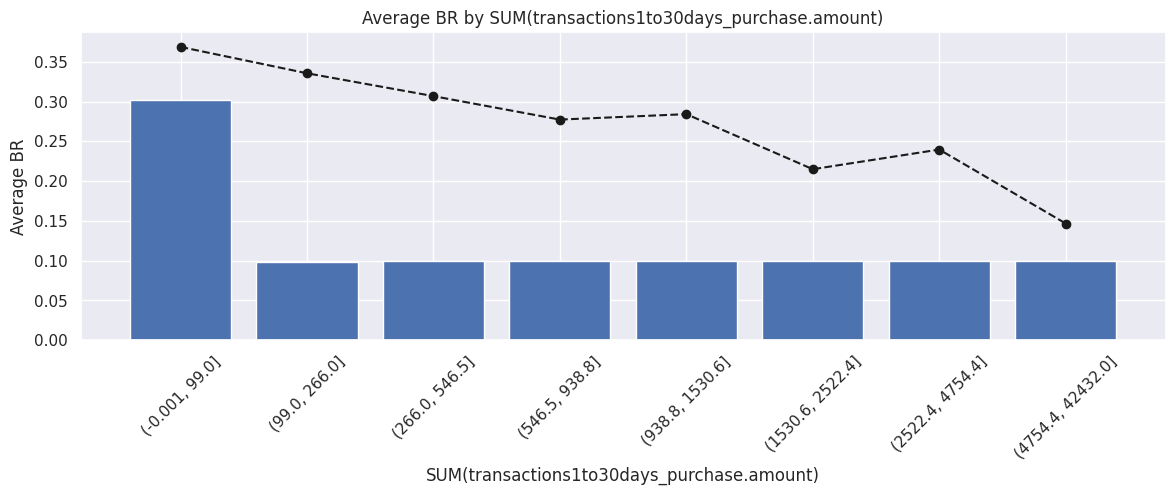

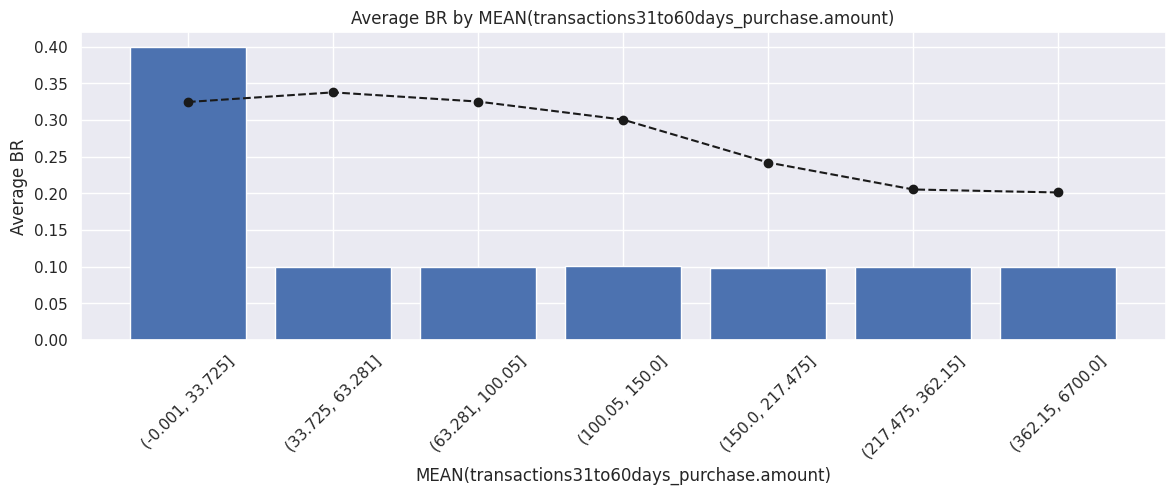

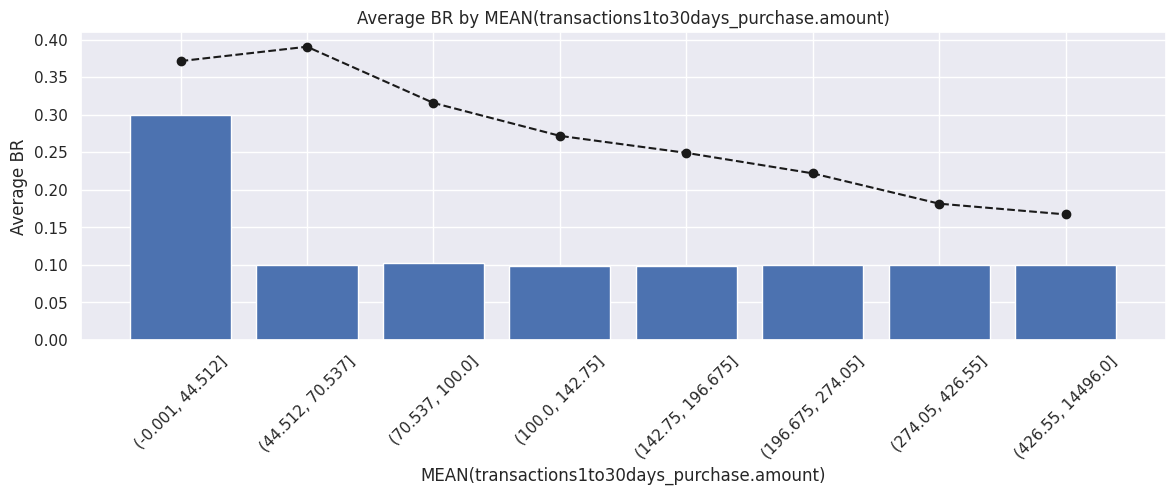

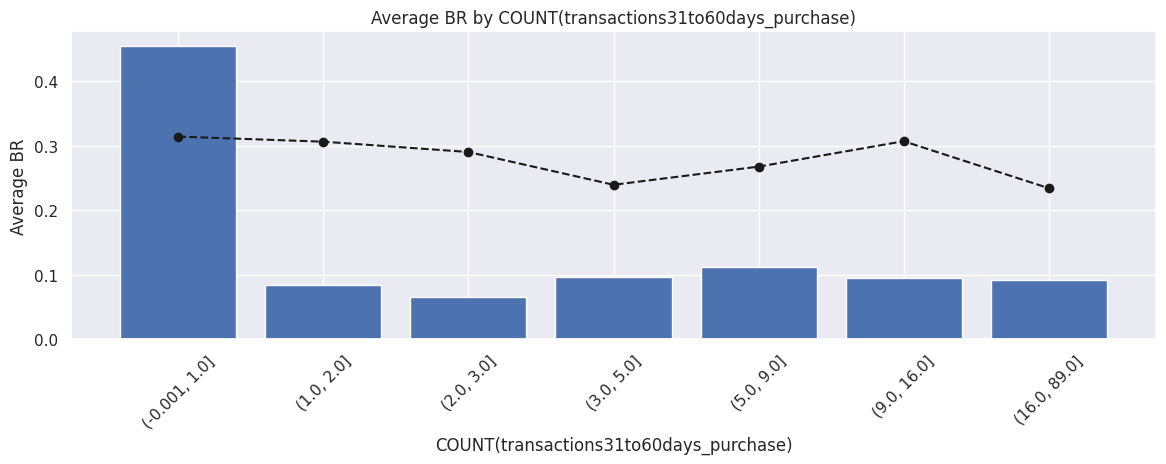

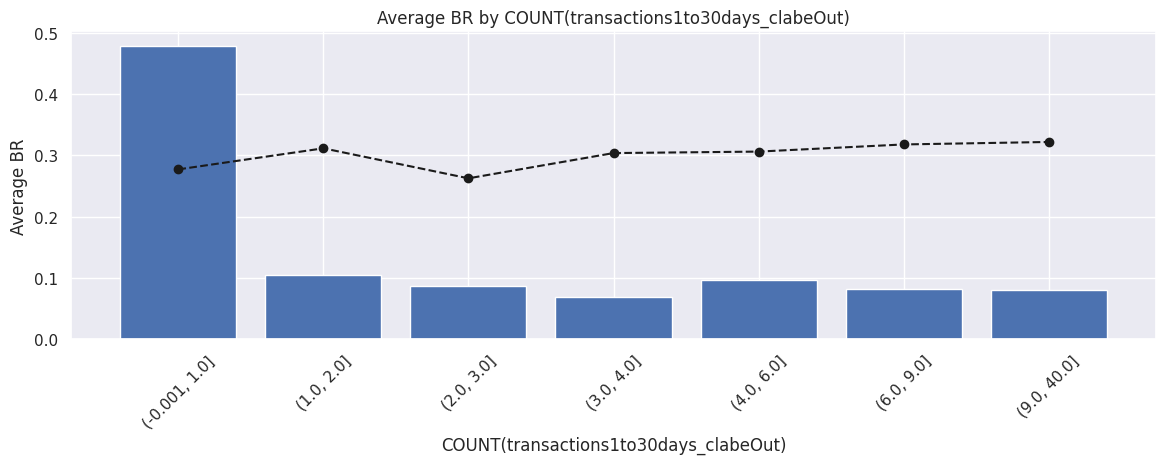

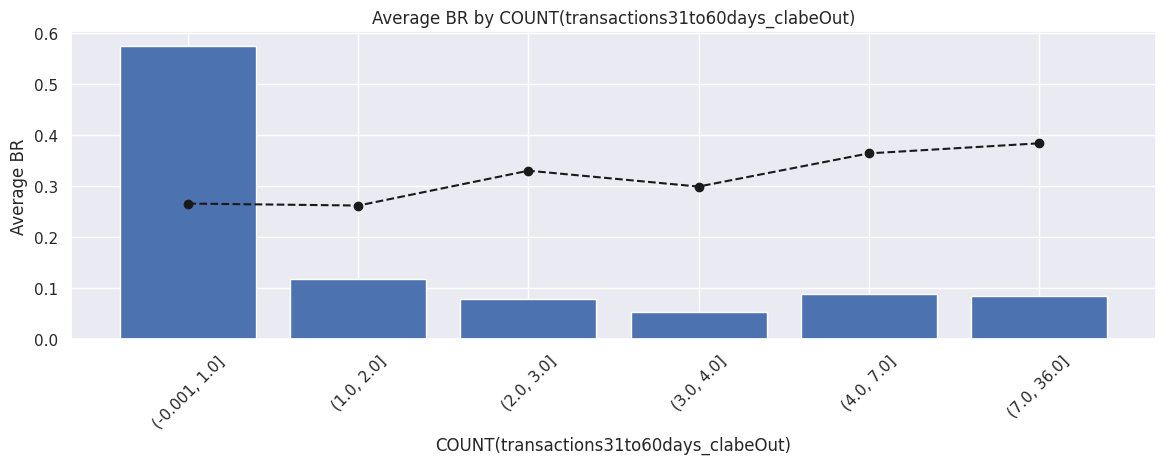

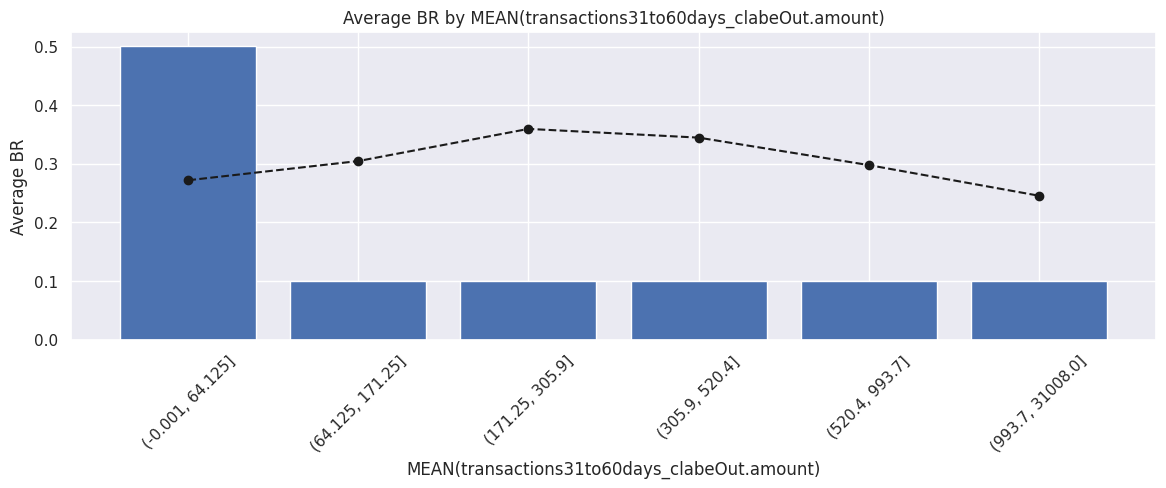

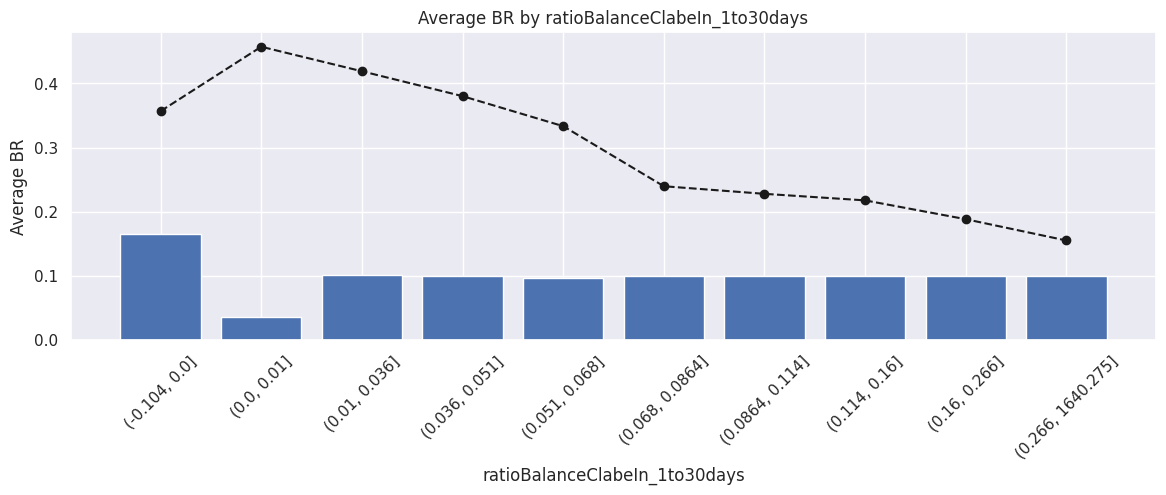

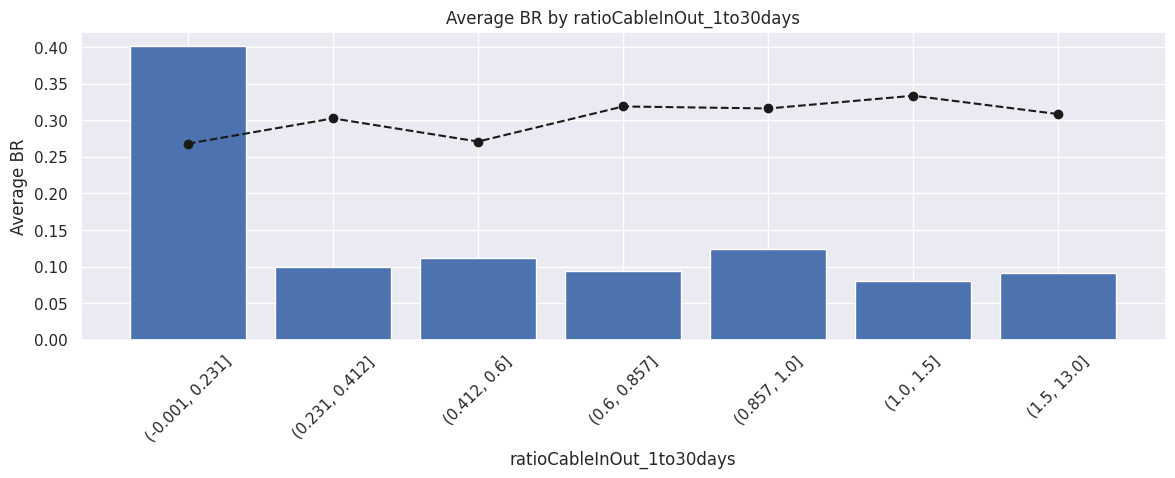

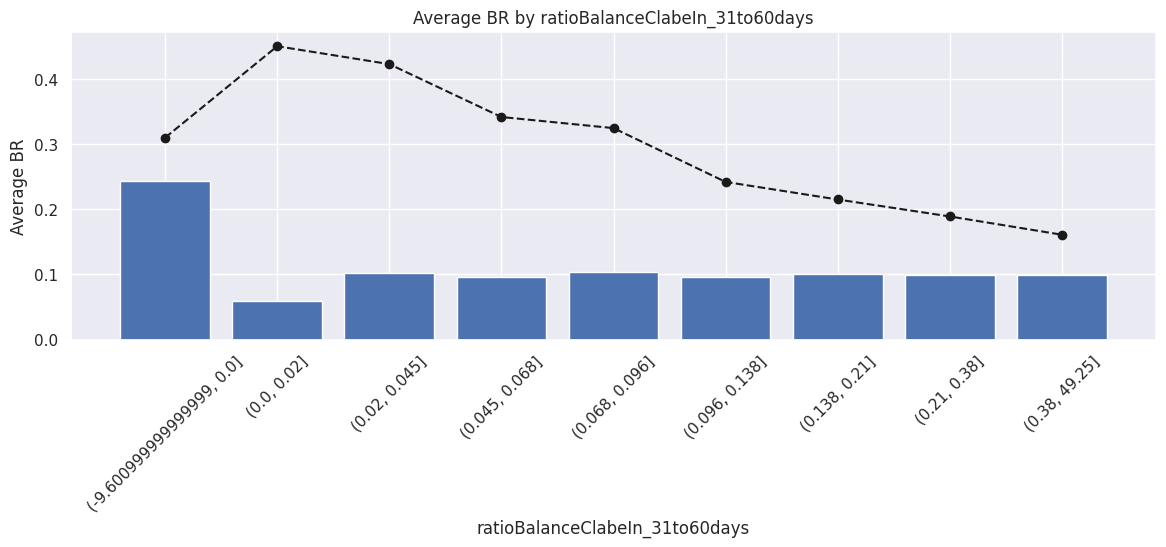

In [61]:
for var in num_vars:
  #df_tempn = woe_ordered_continuous(df_features_num_factors, var, df_scores)
  #print("Value Analysis for: "+var)
  print("")
  #df_tempn.columns = ['var', 'n_obs', 'avg_Score','prop_n_obs']
  #print(df_tempn)
  print("")
  tabla_plot(df_features_num_factors,var,df_scores)
  print("---------------------------------------------------------------------------------------------------")
  print("")
  df_tempn=pd.DataFrame()